To create an concrete-abstract contrast, we sample from concreteness rating norms from the Brysbaert (Brysbaert et al., 2014). A list of items have been created with various psycholinguistic variables controlled using LexOPS (Taylor et al., 2020). From this list, we check the distribution of mean concreteness ratings against the standard deviation of these ratings. 

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

dir = 'U:\ownCloud\projects\FakeDiamond\stimuli'

# Visualise psycholinguistic properties of pairs of concrete-abstract words 

Read in all ratings from Brysbaert et al. (2014)

In [2]:
# ratings_all = pd.read_csv(os.path.join(dir, 'glasgow_norms_column_renamed.csv'))
ratings_all = pd.read_csv(os.path.join(dir, 'brysbaert_etal_2014.csv'))
ratings_all.rename(columns={'Word': 'word'}, inplace=True)
ratings_all.set_index('word', inplace=True)
ratings_all

,Bigram,Conc_M,Conc_SD,Unknown,Total,Percent_known,SUBTLEX,Dom_Pos
word,,,,,,,,
roadsweeper,0,4.85,0.37,1,27,0.96,0,0
traindriver,0,4.54,0.71,3,29,0.90,0,0
tush,0,4.45,1.01,3,25,0.88,66,0
hairdress,0,3.93,1.28,0,29,1.00,1,0
pharmaceutics,0,3.77,1.41,4,26,0.85,0,0
...,...,...,...,...,...,...,...,...
unenvied,0,1.21,0.62,1,30,0.97,0,NaN
agnostically,0,1.20,0.50,2,27,0.93,0,NaN
conceptualistic,0,1.18,0.50,4,26,0.85,0,NaN


Read in sets of words matched using LexOPS (Taylor et al., 2020). The script that generated our initial list of words is in `create_stimuli.Rmd`. In there you can find the parameters, e.g., how we sample different concreteness categories, how we match frequency/length/AoA. Here we used `42` as seed. 

In [3]:
stim_long = pd.read_csv(os.path.join(dir, 'stim_long_brysbaert_all_possible_seed42.csv'))
stim_long = stim_long.rename(columns={'string': 'word'})
stim_long = stim_long.applymap(lambda s: s.lower() if type(s) == str else s)
# stim_long.dropna(inplace=True)
stim_long

,item_nr,condition,match_null,word,Zipf.SUBTLEX_UK,PoS.SUBTLEX_UK,Length,AoA.Kuperman,CNC.Brysbaert
0,1,abstract,a1,superb,4.383176,adjective,6,10.00,1.62
1,1,concrete,a1,marine,4.196932,adjective,6,9.80,4.25
2,2,abstract,a1,coefficient,1.951008,noun,11,13.42,1.85
3,2,concrete,a1,gingivitis,1.774917,noun,10,12.33,4.03
4,3,abstract,a2,unkindness,1.809679,noun,10,7.68,1.96
...,...,...,...,...,...,...,...,...,...
5285,2643,concrete,a1,fingerprint,3.210283,noun,11,7.56,4.96
5286,2644,abstract,a1,liberation,3.507311,noun,10,13.45,2.21
5287,2644,concrete,a1,fragment,3.272077,noun,8,11.53,4.10
5288,2645,abstract,a2,lose,5.112576,verb,4,5.78,2.25


Implement Excel's VLOOKUP function to find concreteness rating SD from Brysbaert et al.'s norms

In [4]:
stim_long['CNC_SD'] = ''
stim_long.set_index('word', inplace=True)
stim_long['CNC_SD'] = stim_long.index.map(ratings_all['Conc_SD'])
stim_long.rename(columns={'CNC.Brysbaert': 'CNC_M', 
                          'Zipf.SUBTLEX_UK': 'Zipf',
                          'PoS.SUBTLEX_UK': 'PoS',
                          'AoA.Kuperman': 'AoA'}, inplace=True)
stim_long.reset_index(inplace=True)
stim_long.drop(labels=['match_null'], axis=1, inplace=True)
stim_long

,word,item_nr,condition,Zipf,PoS,Length,AoA,CNC_M,CNC_SD
0,superb,1,abstract,4.383176,adjective,6,10.00,1.62,1.05
1,marine,1,concrete,4.196932,adjective,6,9.80,4.25,1.11
2,coefficient,2,abstract,1.951008,noun,11,13.42,1.85,1.08
3,gingivitis,2,concrete,1.774917,noun,10,12.33,4.03,1.25
4,unkindness,3,abstract,1.809679,noun,10,7.68,1.96,1.34
...,...,...,...,...,...,...,...,...,...
5285,fingerprint,2643,concrete,3.210283,noun,11,7.56,4.96,0.20
5286,liberation,2644,abstract,3.507311,noun,10,13.45,2.21,1.35
5287,fragment,2644,concrete,3.272077,noun,8,11.53,4.10,1.01
5288,lose,2645,abstract,5.112576,verb,4,5.78,2.25,1.35


Plot distributions of concreteness mean and SD of matched stimuli

<AxesSubplot:xlabel='PoS', ylabel='Count'>

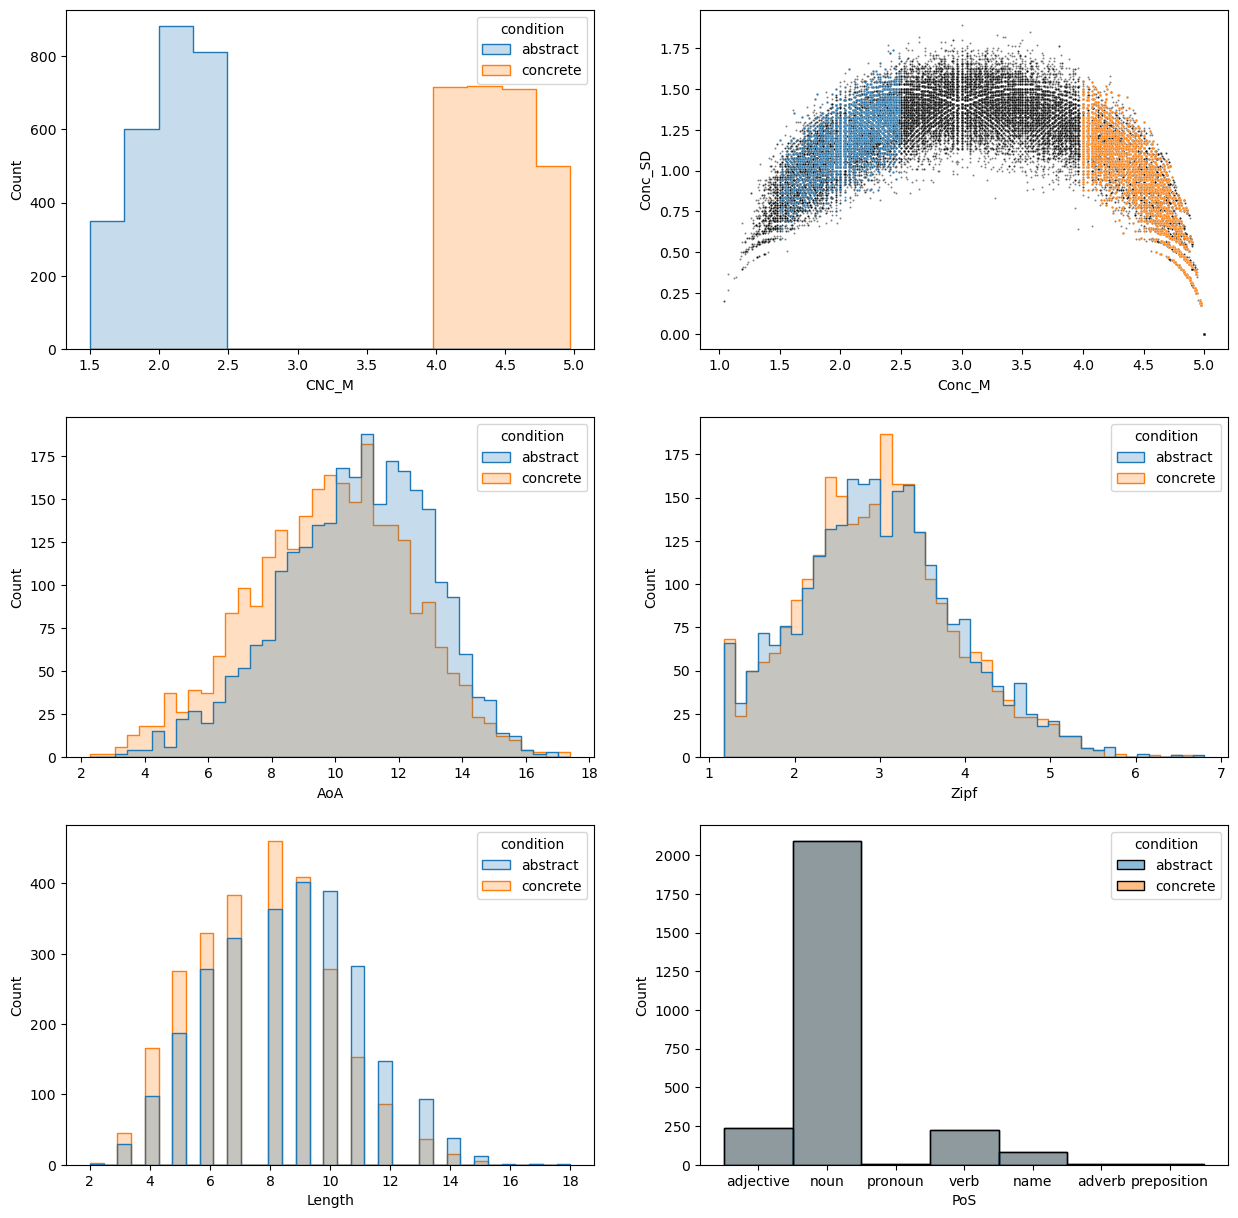

In [5]:
f, ax = plt.subplots(3, 2, figsize=(15,15))
sns.set_context(font_scale=2)
# sns.stripplot(x='condition', y='CNC.Brysbaert.M', data=stim_long, s=2, alpha=0.5, ax=ax[0,0], color='r')
sns.histplot(x='CNC_M', hue='condition', data=stim_long, ax=ax[0,0], element='step')
sns.scatterplot(x='Conc_M', y='Conc_SD', data=ratings_all, s=2, alpha=0.5, ax=ax[0,1], color='black')
sns.scatterplot(x='CNC_M', y='CNC_SD', data=stim_long.query('condition == "abstract"'), s=3, alpha=0.7, ax=ax[0,1], color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
)
sns.scatterplot(x='CNC_M', y='CNC_SD', data=stim_long.query('condition == "concrete"'), s=3, alpha=1, ax=ax[0,1], color=(1.0, 0.4980392156862745, 0.054901960784313725)
)
sns.histplot(x='AoA', hue='condition', data=stim_long, ax=ax[1,0], element='step')
sns.histplot(x='Zipf', hue='condition', data=stim_long, ax=ax[1,1], element='step')
sns.histplot(x='Length', hue='condition', data=stim_long, ax=ax[2,0], element='step')
sns.histplot(x='PoS', hue='condition', data=stim_long, ax=ax[2,1])

# Selection of nouns out of these pairs of words

First change the format of the dataframe such that abstract and concrete words go side by side to help subsetting whilst preserving the matching of psycholinguistic properties.

In [6]:
# select concrete and rename columns
words_concrete = stim_long.query("(condition=='concrete')").reset_index(drop=True) # select concrete only
new_col_name = [c+'_concrete' for c in words_concrete.columns.tolist()]
old_col_name = words_concrete.columns.tolist()
words_concrete.rename(columns=dict(zip(old_col_name, new_col_name)), inplace=True)

# select abstract and rename columns
words_abstract = stim_long.query("(condition=='abstract')").reset_index(drop=True) # select abstract only
new_col_name = [c+'_abstract' for c in words_abstract.columns.tolist()]
old_col_name = words_abstract.columns.tolist()
words_abstract.rename(columns=dict(zip(old_col_name, new_col_name)), inplace=True)

# put pairs of concrete and abstract side by side for further subselecting whilst preserving matching
words = pd.concat([words_concrete,words_abstract], axis=1)
words

,word_concrete,item_nr_concrete,condition_concrete,Zipf_concrete,PoS_concrete,Length_concrete,AoA_concrete,CNC_M_concrete,CNC_SD_concrete,word_abstract,item_nr_abstract,condition_abstract,Zipf_abstract,PoS_abstract,Length_abstract,AoA_abstract,CNC_M_abstract,CNC_SD_abstract
0,marine,1,concrete,4.196932,adjective,6,9.80,4.25,1.11,superb,1,abstract,4.383176,adjective,6,10.00,1.62,1.05
1,gingivitis,2,concrete,1.774917,noun,10,12.33,4.03,1.25,coefficient,2,abstract,1.951008,noun,11,13.42,1.85,1.08
2,sugarcane,3,concrete,1.737128,noun,9,7.63,4.89,0.32,unkindness,3,abstract,1.809679,noun,10,7.68,1.96,1.34
3,costume,4,concrete,4.171842,noun,7,4.17,4.57,0.86,anger,4,abstract,4.303727,noun,5,6.00,2.41,1.32
4,pirate,5,concrete,4.088081,noun,6,6.50,4.64,0.78,relation,5,abstract,4.276319,noun,8,8.11,2.11,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,committee,2641,concrete,4.768941,noun,9,9.83,4.14,0.99,generation,2641,abstract,4.700787,noun,10,9.52,1.96,1.07
2641,douche,2642,concrete,2.495076,noun,6,13.39,4.13,1.31,eminence,2642,abstract,2.645126,noun,8,14.59,1.95,0.95
2642,fingerprint,2643,concrete,3.210283,noun,11,7.56,4.96,0.20,disappearance,2643,abstract,3.415895,noun,13,9.00,2.40,1.38
2643,fragment,2644,concrete,3.272077,noun,8,11.53,4.10,1.01,liberation,2644,abstract,3.507311,noun,10,13.45,2.21,1.35


Select our target words, which are nouns and have length of 7 letters or fewer, then put them back into a long format.

In [7]:
# for both concrete and abstract words, select those that are nouns and have 7 or fewer number of letters
nouns = words.query("(PoS_concrete=='noun') and (Length_concrete<=7) and (Length_abstract<=7)")

# now turn df back into long form
nouns_concrete = nouns[words_concrete.columns].reset_index(drop=True) # rename columns
nouns_abstract = nouns[words_abstract.columns].reset_index(drop=True) # rename columns
nouns_concrete.rename(columns=dict(zip(nouns_concrete.columns.tolist(), stim_long.columns)), inplace=True) # change to common column names
nouns_abstract.rename(columns=dict(zip(nouns_abstract.columns.tolist(), stim_long.columns)), inplace=True) # change to common column names
stim_long_nouns = pd.concat([nouns_concrete,nouns_abstract], axis=0).reset_index(drop=True)
stim_long_nouns

,word,item_nr,condition,Zipf,PoS,Length,AoA,CNC_M,CNC_SD
0,costume,4,concrete,4.171842,noun,7,4.17,4.57,0.86
1,crystal,9,concrete,4.162752,noun,7,7.78,4.58,0.81
2,pedal,11,concrete,3.634756,noun,5,6.50,4.44,0.97
3,rook,13,concrete,2.888860,noun,4,11.59,4.38,1.10
4,mink,14,concrete,3.128705,noun,4,10.32,4.58,0.99
...,...,...,...,...,...,...,...,...,...
1011,decorum,2572,abstract,2.767618,noun,7,15.12,2.36,1.50
1012,way,2582,abstract,6.118429,noun,3,5.39,2.34,1.37
1013,macabre,2598,abstract,2.981293,noun,7,14.50,2.25,1.39
1014,moment,2625,abstract,5.574384,noun,6,7.95,1.61,1.10


In [9]:
# save the list of nouns for creating more specific versions of the nouns for another experimental contrast
stim_long_nouns.to_csv(os.path.join(dir, 'nouns_{}.csv'.format(date.today())), index=False)

Visualise the psycholinguistic properties of the result pairs of words.

<AxesSubplot:xlabel='PoS', ylabel='Count'>

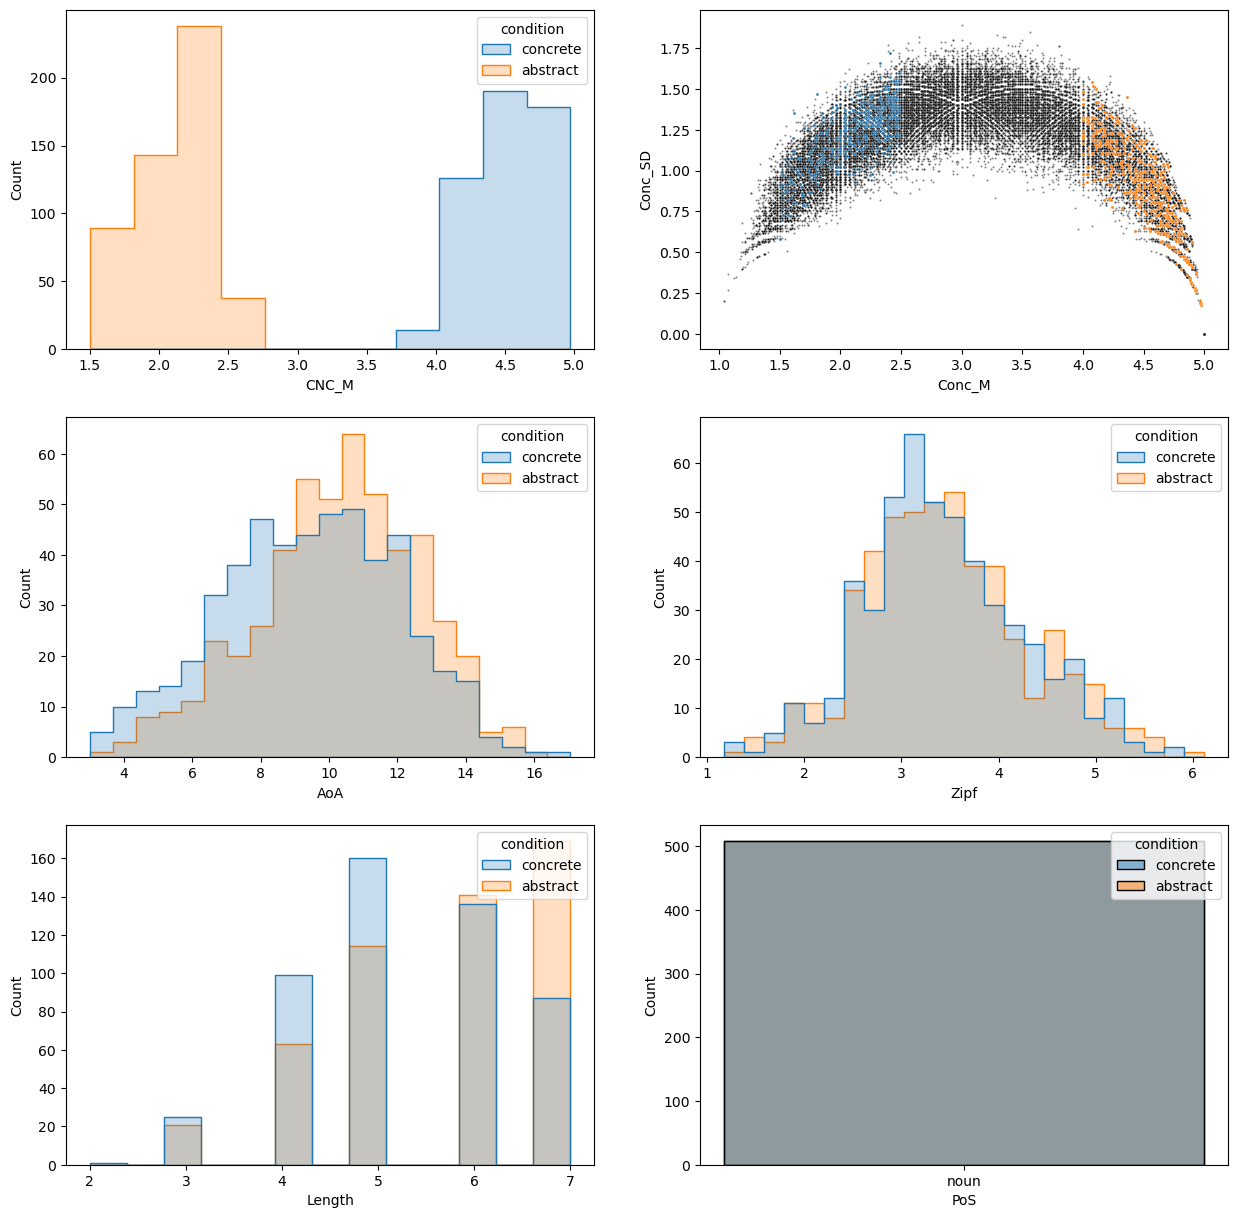

In [12]:
f, ax = plt.subplots(3, 2, figsize=(15,15))
sns.set_context(font_scale=2)
sns.histplot(x='CNC_M', hue='condition', data=stim_long_nouns, ax=ax[0,0], element='step')
sns.scatterplot(x='Conc_M', y='Conc_SD', data=ratings_all, s=2, alpha=0.5, ax=ax[0,1], color='black')
sns.scatterplot(x='CNC_M', y='CNC_SD', data=stim_long_nouns.query('condition == "abstract"'), s=5, alpha=0.7, ax=ax[0,1], color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
)
sns.scatterplot(x='CNC_M', y='CNC_SD', data=stim_long_nouns.query('condition == "concrete"'), s=5, alpha=1, ax=ax[0,1], color=(1.0, 0.4980392156862745, 0.054901960784313725)
)
sns.histplot(x='AoA', hue='condition', data=stim_long_nouns, ax=ax[1,0], element='step')
sns.histplot(x='Zipf', hue='condition', data=stim_long_nouns, ax=ax[1,1], element='step')
sns.histplot(x='Length', hue='condition', data=stim_long_nouns, ax=ax[2,0], element='step')
sns.histplot(x='PoS', hue='condition', data=stim_long_nouns, ax=ax[2,1])

Visualise concreteness selection

[Text(0.5, 0, ''), Text(0, 0.5, '')]

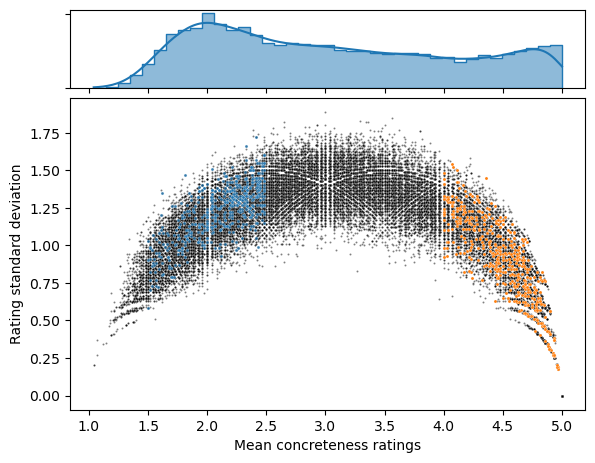

In [41]:
# Start with a square Figure.
fig = plt.figure(figsize=(8.25, 5))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax.set(xlabel="Mean concreteness ratings", ylabel="Rating standard deviation")
# Draw the scatter plot and marginals.
sns.scatterplot(x='Conc_M', y='Conc_SD', data=ratings_all, s=2, alpha=0.5, ax=ax, color='black')
sns.scatterplot(x='CNC_M', y='CNC_SD', data=stim_long_nouns.query('condition == "abstract"'), s=5, alpha=0.7, ax=ax, color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
)
sns.scatterplot(x='CNC_M', y='CNC_SD', data=stim_long_nouns.query('condition == "concrete"'), s=5, alpha=1, ax=ax, color=(1.0, 0.4980392156862745, 0.054901960784313725)
)
sns.histplot(x='Conc_M', data=ratings_all, ax=ax_histx, element='step', kde=True)
ax_histx.tick_params(axis='both', labelbottom=False, labelleft=False)
ax_histx.set(xlabel='',ylabel='')

# Make phrases
We create phrases out of a small set of adjectives (good, recent, typical, possible, alleged, dubious) and the list of nouns selected from above

In [11]:
# repeat each row 6 times to be composed with 6 different adjectives
adjectives = ['good','recent','typical','new','possible','potential','past','fake']
adj_types = ['subsective','non-subsective']
phrases = pd.DataFrame(np.repeat(stim_long_nouns[['word','condition']].values, len(adjectives), axis=0))
phrases.columns = ['noun','condition']
phrases['adjective'] = adjectives*len(stim_long_nouns)
phrases['denotation'] = np.repeat(['subsective','non-subsective'], len(adjectives)/2).tolist()*len(stim_long_nouns)
phrases['phrase'] = phrases['adjective'] + ' ' + phrases['noun']
phrases

,noun,condition,adjective,denotation,phrase
0,costume,concrete,good,subsective,good costume
1,costume,concrete,recent,subsective,recent costume
2,costume,concrete,typical,subsective,typical costume
3,costume,concrete,new,subsective,new costume
4,costume,concrete,possible,non-subsective,possible costume
...,...,...,...,...,...
8123,empathy,abstract,new,subsective,new empathy
8124,empathy,abstract,possible,non-subsective,possible empathy
8125,empathy,abstract,potential,non-subsective,potential empathy
8126,empathy,abstract,past,non-subsective,past empathy


In [12]:
phrases.dropna(inplace=True)
phrases

,noun,condition,adjective,denotation,phrase
0,costume,concrete,good,subsective,good costume
1,costume,concrete,recent,subsective,recent costume
2,costume,concrete,typical,subsective,typical costume
3,costume,concrete,new,subsective,new costume
4,costume,concrete,possible,non-subsective,possible costume
...,...,...,...,...,...
8123,empathy,abstract,new,subsective,new empathy
8124,empathy,abstract,possible,non-subsective,possible empathy
8125,empathy,abstract,potential,non-subsective,potential empathy
8126,empathy,abstract,past,non-subsective,past empathy


In [13]:
phrases.to_csv(os.path.join(dir, 'phrases_repeat_2023-02-07.csv'), index=False)